![pic](https://i.pinimg.com/736x/b7/c0/c7/b7c0c702381273c49fec3838371a1256.jpg)

In [111]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [112]:
path = "/kaggle/input/fmnist-small/fmnist_small.csv"

In [113]:
torch.manual_seed(42)

In [114]:
df = pd.read_csv(path)
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0


# Sample Images

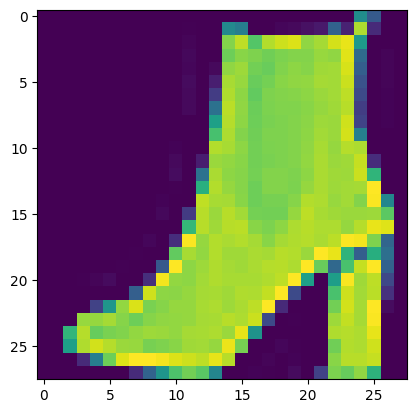

In [115]:
sample_image = df.iloc[0, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(sample_image)
plt.show()

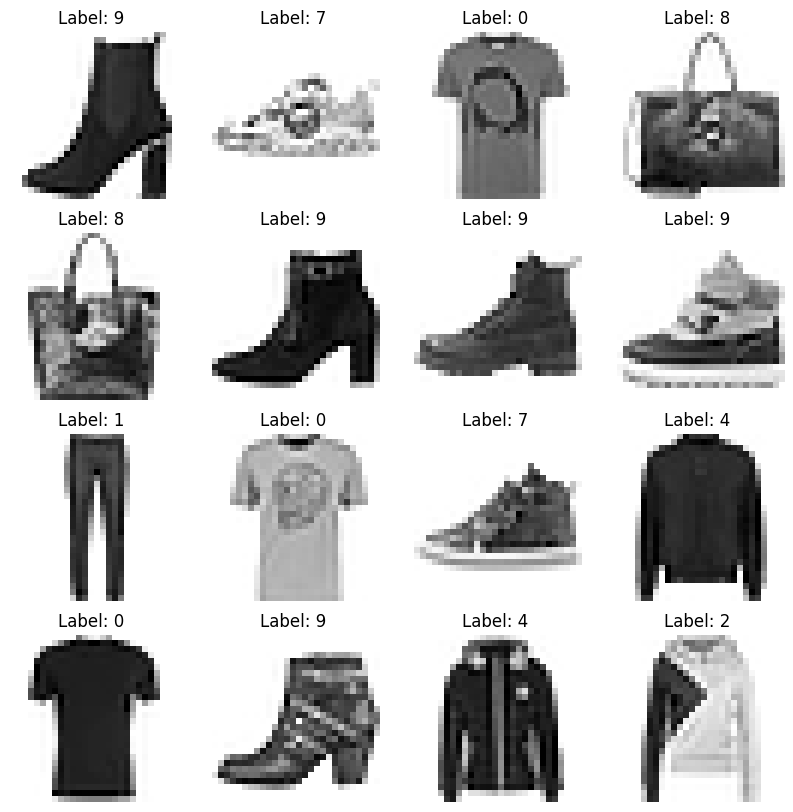

In [116]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap=plt.cm.binary )
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i, 0]} ")

plt.show()

# Train Test Split

In [117]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(f"{X.shape}, {y.shape} ")

(6000, 784), (6000,) 


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [119]:
# scaling the features
X_train = X_train / 255.0
X_test  = X_test / 255.0

# Custom Dataset

In [120]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [121]:
# create train dataset object
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Data Loader


In [122]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Define the NN Class

In [123]:
class SimpleNN(nn.Module):

    def __init__(self, num_features):

        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [124]:
EPOCHS = 100
LR = 0.1

# Model instance 

In [125]:
model = SimpleNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=LR)

In [126]:
summary(model)

Layer (type:depth-idx)                   Param #
SimpleNN                                 --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       100,480
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       8,256
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       650
│    └─Sigmoid: 2-6                      --
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0

In [127]:
print(batch_features.dtype)
print(next(model.parameters()).dtype)

torch.float32
torch.float32


# Training loop

In [128]:
for epoch in range(EPOCHS):

    total_epoch_loss = 0

    for batch_features, batch_labels in train_loader:
        
        outputs = model(batch_features)         # forward pass
        loss = criterion(outputs, batch_labels)  # calculate loss

        optimizer.zero_grad()    # back pass
        loss.backward()
        optimizer.step()         # update grads
        
        # total epochs loss
        total_epoch_loss +=  loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f"Epoch: {epoch + 1} | Loss: {avg_loss}")

Epoch: 1 | Loss: 2.2006390420595805
Epoch: 2 | Loss: 1.9076541058222454
Epoch: 3 | Loss: 1.8105571627616883
Epoch: 4 | Loss: 1.775535574754079
Epoch: 5 | Loss: 1.752898887793223
Epoch: 6 | Loss: 1.7349748913447063
Epoch: 7 | Loss: 1.724627746740977
Epoch: 8 | Loss: 1.717173663775126
Epoch: 9 | Loss: 1.71221293369929
Epoch: 10 | Loss: 1.7080545099576314
Epoch: 11 | Loss: 1.7043953943252563
Epoch: 12 | Loss: 1.701394987901052
Epoch: 13 | Loss: 1.6982527351379395
Epoch: 14 | Loss: 1.6962596074740093
Epoch: 15 | Loss: 1.6933727995554606
Epoch: 16 | Loss: 1.6907865262031556
Epoch: 17 | Loss: 1.6879830702145895
Epoch: 18 | Loss: 1.6861039598782857
Epoch: 19 | Loss: 1.6760007270177206
Epoch: 20 | Loss: 1.6704536310831706
Epoch: 21 | Loss: 1.6668907880783081
Epoch: 22 | Loss: 1.6543804995218914
Epoch: 23 | Loss: 1.6474407235781352
Epoch: 24 | Loss: 1.644608039855957
Epoch: 25 | Loss: 1.6417710423469543
Epoch: 26 | Loss: 1.6404141974449158
Epoch: 27 | Loss: 1.6386435723304749
Epoch: 28 | Loss: 

# Evaluation

In [129]:
model.eval()

SimpleNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Sigmoid()
  )
)

In [132]:
# test evaluation 
total = 0
correct = 0

with torch.no_grad():
    
    for batch_features, batch_labels in test_loader:
        
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        total += batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()

print(f"Accuracy: {correct/total} ")

Accuracy: 0.6775 
